In [200]:
import pandas as pd
import numpy as np

In [201]:
import statsmodels.api as sts
import sklearn

In [202]:
bike = pd.read_csv('day.csv')

In [203]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [204]:
#creating the dummy values for 'weathersit' feature
weathersit_values = ["clear", "mist_cloudy", "light_snow", "heavy_rain"]
bike['weathersit'] = bike['weathersit'].apply(lambda x: weathersit_values[x-1])
weather_dummy = pd.get_dummies(bike['weathersit'])

In [205]:
weather_dummy

,clear,light_snow,mist_cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,0,1
726,0,0,1
727,0,0,1
728,1,0,0


In [206]:
bike = pd.concat([bike, weather_dummy], axis=1)

In [207]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clear,light_snow,mist_cloudy
0,1,01-01-2018,1,0,1,0,6,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,02-01-2018,1,0,1,0,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,03-01-2018,1,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,1,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,1,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [208]:
bike.drop(['weathersit'], axis=1, inplace=True)

In [209]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clear,light_snow,mist_cloudy
0,1,01-01-2018,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,02-01-2018,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,03-01-2018,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [210]:
bike.drop(['dteday'], axis=1, inplace=True)

In [211]:
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clear,light_snow,mist_cloudy
0,1,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [213]:
#dropped the 'month' as this was not significant at all -  we already have seasonal data and weather data
bike.drop(['mnth'], axis=1, inplace=True)
bike.head()

,instant,season,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clear,light_snow,mist_cloudy
0,1,1,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,1,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,1,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,1,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [214]:
#dummy variables for season
season_val = ['spring', 'summer', 'fall', 'winter']
bike['season'] = bike['season'].apply(lambda x: season_val[x-1])
bike.head()

,instant,season,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clear,light_snow,mist_cloudy
0,1,spring,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,spring,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,spring,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,spring,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,spring,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [215]:
season_cat = pd.get_dummies(bike['season'])
season_cat.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [216]:
bike = pd.concat([bike, season_cat], axis=1)

In [217]:
bike.drop(['season'], axis=1, inplace=True)
bike.head()

,instant,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clear,light_snow,mist_cloudy,fall,spring,summer,winter
0,1,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,0,1,0,0
1,2,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,0,1,0,0
2,3,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,1,0,0
3,4,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,1,0,0
4,5,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,1,0,0


In [218]:
#unecessary column - just a servial number
bike.drop(['instant'], axis=1, inplace=True)
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clear,light_snow,mist_cloudy,fall,spring,summer,winter
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,0,1,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,0,1,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,1,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,1,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,1,0,0


In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

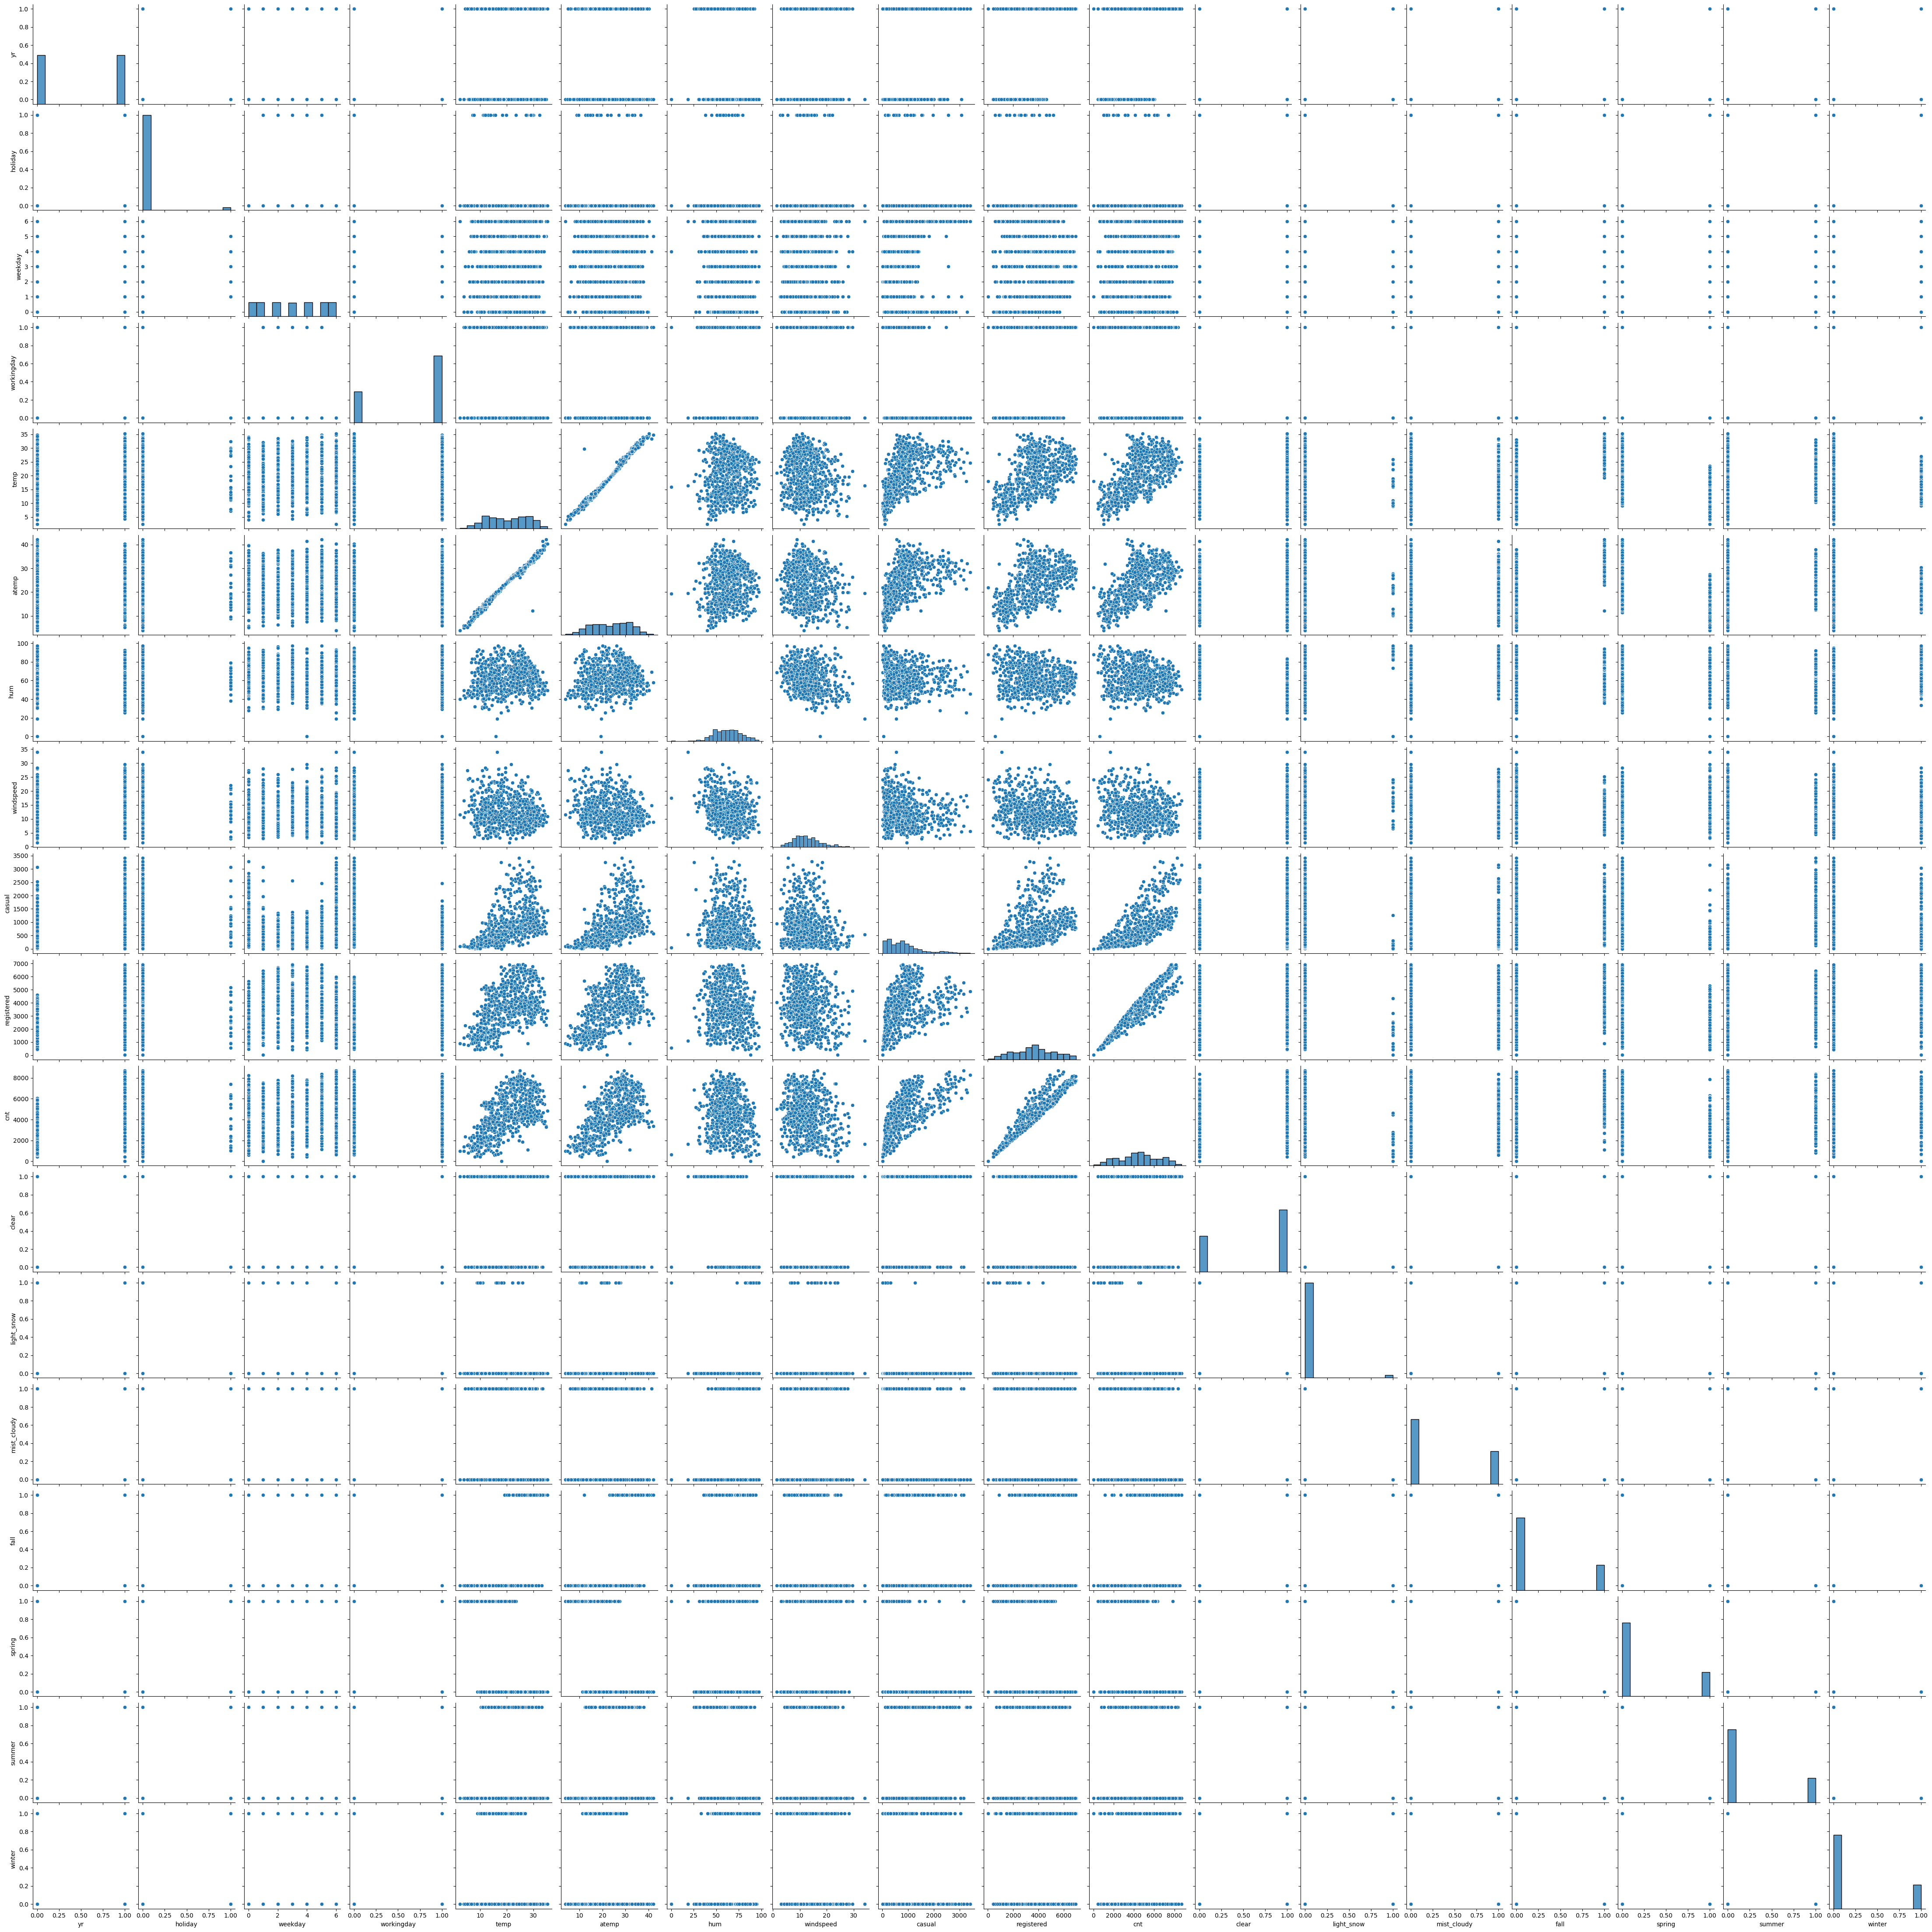

In [220]:
sns.pairplot(bike)
plt.show()

In [221]:
# We already have the total count of the user in feature 'cnt' so casual and registered user was not necessary
bike.drop(['casual','registered'], axis=1, inplace=True)
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear,light_snow,mist_cloudy,fall,spring,summer,winter
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0


In [222]:
# split the data in test and train set
from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state = 100)

In [223]:
bike_train.shape


(510, 16)

In [224]:
bike.shape

(730, 16)

In [225]:
#Scaling of the data better interpretation
from sklearn.preprocessing import MinMaxScaler

In [226]:
scaler = MinMaxScaler()

In [227]:
scaling_val = ['temp', 'atemp','hum', 'windspeed']
bike_train[scaling_val] = scaler.fit_transform(bike_train[scaling_val])
bike_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear,light_snow,mist_cloudy,fall,spring,summer,winter
653,1,0,2,1,0.509887,0.501133,0.575354,0.300794,7534,1,0,0,0,0,0,1
576,1,0,2,1,0.815169,0.766351,0.725633,0.264686,7216,1,0,0,1,0,0,0
426,1,0,6,0,0.442393,0.438975,0.640189,0.255342,4066,0,0,1,0,1,0,0
728,1,0,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,0,1,0,0
482,1,0,6,0,0.395666,0.391735,0.504508,0.188475,4220,0,0,1,0,0,1,0


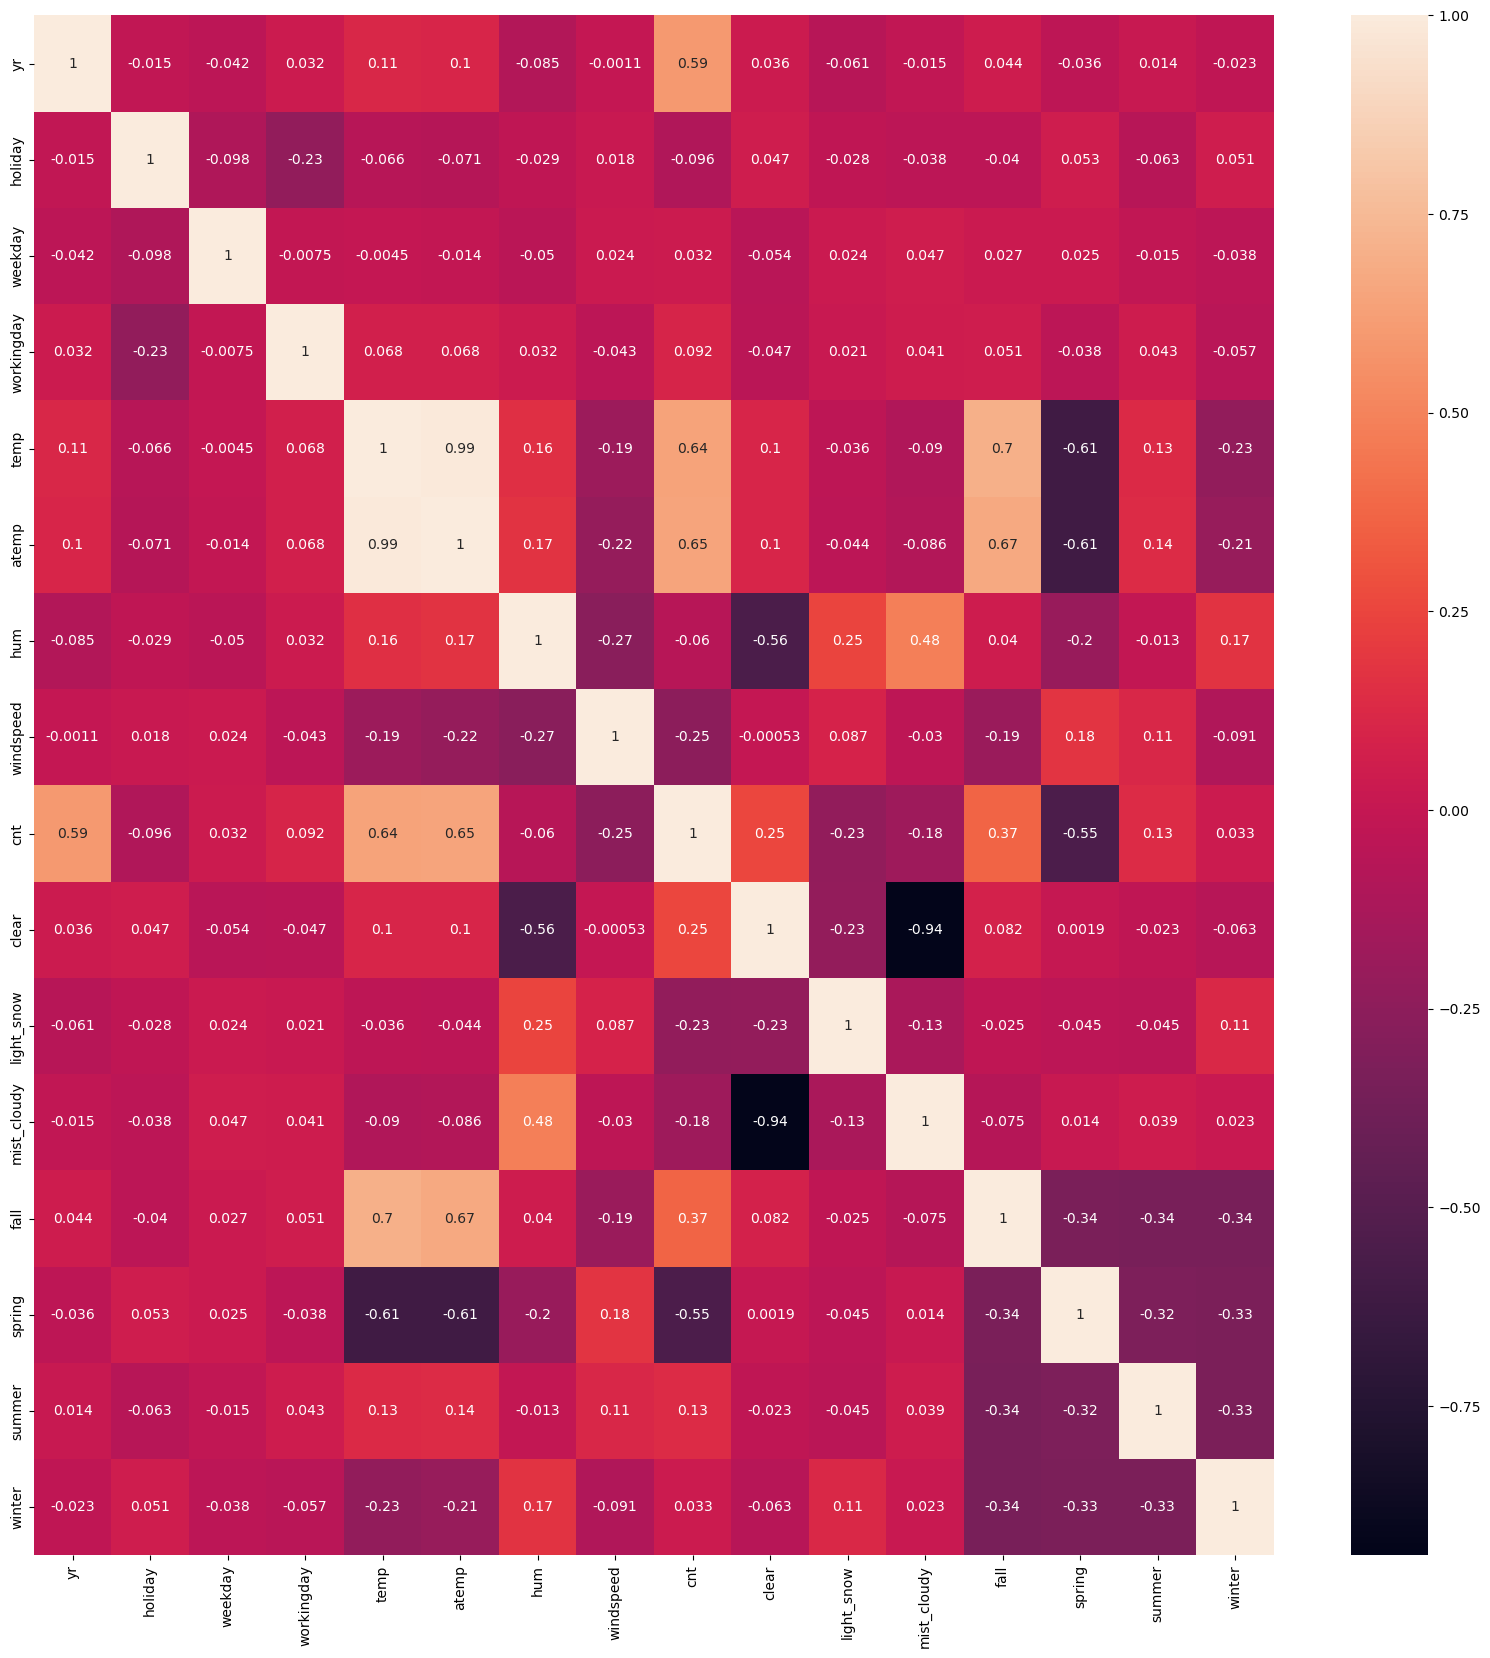

In [228]:
# to get the understanding of the correlation of the different features
plt.figure(figsize = (20,20))
sns.heatmap(bike_train.corr(), annot=True)
plt.show()

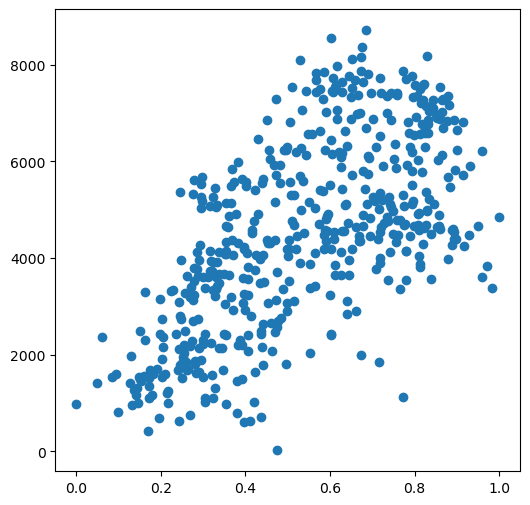

In [229]:
# we can see the 'temp' and 'cnt' has a linear relation
plt.figure(figsize=[6,6])
plt.scatter(bike_train['temp'], bike_train['cnt'])
plt.show()

In [230]:
# Divide train data into X and y set
y_train = bike_train.pop('cnt')
X_train = bike_train
X_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,clear,light_snow,mist_cloudy,fall,spring,summer,winter
653,1,0,2,1,0.509887,0.501133,0.575354,0.300794,1,0,0,0,0,0,1
576,1,0,2,1,0.815169,0.766351,0.725633,0.264686,1,0,0,1,0,0,0
426,1,0,6,0,0.442393,0.438975,0.640189,0.255342,0,0,1,0,1,0,0
728,1,0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0
482,1,0,6,0,0.395666,0.391735,0.504508,0.188475,0,0,1,0,0,1,0


In [231]:
# create a model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm)
lr = lr.fit()

In [232]:
lr.params

const           879.817290
yr             2016.488577
holiday        -553.386983
weekday          70.861297
workingday      162.723674
temp           3787.496740
atemp           527.939824
hum           -1079.764529
windspeed     -1545.185477
clear          1182.957052
light_snow     -977.659363
mist_cloudy     674.519600
fall             98.053428
spring         -555.880496
summer          465.245294
winter          872.399064
dtype: float64

In [233]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.35e-183
Time:                        21:32:50   Log-Likelihood:                -4129.9
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         879.8173    199.767      4.404      0.000     487.324    1272.311
yr           2016.4886     72.713     27.732      0.000    1873.625    2159.352
holiday      -553.3870    235.425     -2.351      0.019   -1015.940     -90.833
weekday        70.8613     17.998      3.937      0.000      35.499     106.223
workingday    162.7237     78.916      2.062      0.040       7.674     317.774
temp         3787.4967   1205.521      3.142      0.002    1418.940    6156.054
atemp         527.9398   1231.971      0.429      0.668   -1892.585    2948.465
hum         -1079.7645    337.017     -3.204      0.001   -1741.921    -417.608
windspeed   -1545.1855    234.627     -6.586      0.000   -2006.170   -1084.201
clear        1182.9571     78.963     14.981      0.000    1027.813    1338.101
light_snow   -977.6594    188.832     -5.177      0.000   -1348.668    -606.650
mist_cloudy   674.5196     98.698      6.834      0.000     480.602     868.437
fall           98.0534    122.167      0.803      0.423    -141.975     338.082
spring       -555.8805     92.254     -6.026      0.000    -737.138    -374.623
summer        465.2453     86.880      5.355      0.000     294.548     635.943
winter        872.3991     83.059     10.503      0.000     709.207    1035.591
==============================================================================
Omnibus:                       74.027   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.685
Skew:                          -0.733   Prob(JB):                     6.46e-42
Kurtosis:                       5.603   Cond. No.                     6.46e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [234]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [235]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Renu_Kumari\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
8,clear,inf
9,light_snow,inf
10,mist_cloudy,inf
11,fall,inf
12,spring,inf
13,summer,inf
14,winter,inf
4,temp,57.99
5,atemp,53.56
6,hum,1.89


In [236]:
# As we know 'temp' refers to temperature of the day and 'atemp' refers to the temperature felt by people/users
# Hence either feature would be sufficient as they are very close, or we can take average of both to create new feature 'avgtemp'

X_train['avgtemp'] = X_train[['temp','atemp']].mean(axis=1)
X_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,clear,light_snow,mist_cloudy,fall,spring,summer,winter,avgtemp
653,1,0,2,1,0.509887,0.501133,0.575354,0.300794,1,0,0,0,0,0,1,0.505510
576,1,0,2,1,0.815169,0.766351,0.725633,0.264686,1,0,0,1,0,0,0,0.790760
426,1,0,6,0,0.442393,0.438975,0.640189,0.255342,0,0,1,0,1,0,0,0.440684
728,1,0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0.222725
482,1,0,6,0,0.395666,0.391735,0.504508,0.188475,0,0,1,0,0,1,0,0.393701


In [237]:
X_train.drop(['temp','atemp'], axis=1, inplace=True)
X_train.head()

,yr,holiday,weekday,workingday,hum,windspeed,clear,light_snow,mist_cloudy,fall,spring,summer,winter,avgtemp
653,1,0,2,1,0.575354,0.300794,1,0,0,0,0,0,1,0.505510
576,1,0,2,1,0.725633,0.264686,1,0,0,1,0,0,0,0.790760
426,1,0,6,0,0.640189,0.255342,0,0,1,0,1,0,0,0.440684
728,1,0,0,0,0.498067,0.663106,1,0,0,0,1,0,0,0.222725
482,1,0,6,0,0.504508,0.188475,0,0,1,0,0,1,0,0.393701


In [238]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm)
lr = lr.fit()
lr.params

const           881.662634
yr             2019.913997
holiday        -540.183583
weekday          72.132462
workingday      163.585940
hum           -1086.153418
windspeed     -1484.008373
clear          1178.417163
light_snow     -966.541316
mist_cloudy     669.786786
fall            135.076583
spring         -570.505963
summer          461.554230
winter          855.537785
avgtemp        4351.357959
dtype: float64

In [239]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.6
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.26e-184
Time:                        21:32:50   Log-Likelihood:                -4130.8
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     497   BIC:                             8343.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         881.6626    199.926      4.410      0.000     488.858    1274.467
yr           2019.9140     72.728     27.773      0.000    1877.022    2162.806
holiday      -540.1836    235.414     -2.295      0.022   -1002.713     -77.654
weekday        72.1325     17.988      4.010      0.000      36.790     107.475
workingday    163.5859     78.978      2.071      0.039       8.414     318.757
hum         -1086.1534    337.260     -3.221      0.001   -1748.785    -423.522
windspeed   -1484.0084    230.382     -6.442      0.000   -1936.651   -1031.365
clear        1178.4172     78.956     14.925      0.000    1023.288    1333.546
light_snow   -966.5413    188.806     -5.119      0.000   -1337.498    -595.584
mist_cloudy   669.7868     98.717      6.785      0.000     475.834     863.740
fall          135.0766    119.136      1.134      0.257     -98.995     369.148
spring       -570.5060     91.689     -6.222      0.000    -750.652    -390.360
summer        461.5542     86.908      5.311      0.000     290.803     632.306
winter        855.5378     82.179     10.411      0.000     694.077    1016.999
avgtemp      4351.3580    302.086     14.404      0.000    3757.834    4944.881
==============================================================================
Omnibus:                       76.484   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.842
Skew:                          -0.758   Prob(JB):                     4.91e-43
Kurtosis:                       5.621   Cond. No.                     3.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.67e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [240]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


C:\Users\Renu_Kumari\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
6,clear,inf
7,light_snow,inf
8,mist_cloudy,inf
9,fall,inf
10,spring,inf
11,summer,inf
12,winter,inf
13,avgtemp,3.40
4,hum,1.89
5,windspeed,1.20


In [241]:
# as we see 'inf' VIF for season and weather features and the p-value is also higher for fall, Hence it is good to drop it.
X_train.drop(['fall'], axis=1, inplace=True)
X_train.head()

,yr,holiday,weekday,workingday,hum,windspeed,clear,light_snow,mist_cloudy,spring,summer,winter,avgtemp
653,1,0,2,1,0.575354,0.300794,1,0,0,0,0,1,0.505510
576,1,0,2,1,0.725633,0.264686,1,0,0,0,0,0,0.790760
426,1,0,6,0,0.640189,0.255342,0,0,1,1,0,0,0.440684
728,1,0,0,0,0.498067,0.663106,1,0,0,1,0,0,0.222725
482,1,0,6,0,0.504508,0.188475,0,0,1,0,1,0,0.393701


In [242]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm)
lr = lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.6
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.26e-184
Time:                        21:32:50   Log-Likelihood:                -4130.8
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     497   BIC:                             8343.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         982.9701    263.922      3.724      0.000     464.429    1501.511
yr           2019.9140     72.728     27.773      0.000    1877.022    2162.806
holiday      -540.1836    235.414     -2.295      0.022   -1002.713     -77.654
weekday        72.1325     17.988      4.010      0.000      36.790     107.475
workingday    163.5859     78.978      2.071      0.039       8.414     318.757
hum         -1086.1534    337.260     -3.221      0.001   -1748.785    -423.522
windspeed   -1484.0084    230.382     -6.442      0.000   -1936.651   -1031.365
clear        1212.1863     93.024     13.031      0.000    1029.418    1394.955
light_snow   -932.7722    200.276     -4.657      0.000   -1326.265    -539.279
mist_cloudy   703.5559    112.950      6.229      0.000     481.638     925.474
spring       -705.5825    174.712     -4.039      0.000   -1048.848    -362.317
summer        326.4776    117.703      2.774      0.006      95.220     557.735
winter        720.4612    142.712      5.048      0.000     440.068    1000.854
avgtemp      4351.3580    302.086     14.404      0.000    3757.834    4944.881
==============================================================================
Omnibus:                       76.484   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.842
Skew:                          -0.758   Prob(JB):                     4.91e-43
Kurtosis:                       5.621   Cond. No.                     2.64e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [243]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,clear,49.55
8,mist_cloudy,33.09
9,spring,4.40
7,light_snow,4.27
12,avgtemp,3.40
11,winter,2.98
10,summer,2.01
4,hum,1.89
5,windspeed,1.20
1,holiday,1.08


In [244]:
# the VIF of 'clear' is too high and p-valeus are low so clearly we have to drop it
X_train.drop(['clear'], axis=1, inplace=True)
X_train.head()

,yr,holiday,weekday,workingday,hum,windspeed,light_snow,mist_cloudy,spring,summer,winter,avgtemp
653,1,0,2,1,0.575354,0.300794,0,0,0,0,1,0.505510
576,1,0,2,1,0.725633,0.264686,0,0,0,0,0,0.790760
426,1,0,6,0,0.640189,0.255342,0,1,1,0,0,0.440684
728,1,0,0,0,0.498067,0.663106,0,0,1,0,0,0.222725
482,1,0,6,0,0.504508,0.188475,0,1,0,1,0,0.393701


In [245]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm)
lr = lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.6
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.26e-184
Time:                        21:32:50   Log-Likelihood:                -4130.8
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     497   BIC:                             8343.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2195.1564    317.669      6.910      0.000    1571.017    2819.296
yr           2019.9140     72.728     27.773      0.000    1877.022    2162.806
holiday      -540.1836    235.414     -2.295      0.022   -1002.713     -77.654
weekday        72.1325     17.988      4.010      0.000      36.790     107.475
workingday    163.5859     78.978      2.071      0.039       8.414     318.757
hum         -1086.1534    337.260     -3.221      0.001   -1748.785    -423.522
windspeed   -1484.0084    230.382     -6.442      0.000   -1936.651   -1031.365
light_snow  -2144.9585    236.498     -9.070      0.000   -2609.617   -1680.300
mist_cloudy  -508.6304     94.582     -5.378      0.000    -694.460    -322.801
spring       -705.5825    174.712     -4.039      0.000   -1048.848    -362.317
summer        326.4776    117.703      2.774      0.006      95.220     557.735
winter        720.4612    142.712      5.048      0.000     440.068    1000.854
avgtemp      4351.3580    302.086     14.404      0.000    3757.834    4944.881
==============================================================================
Omnibus:                       76.484   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.842
Skew:                          -0.758   Prob(JB):                     4.91e-43
Kurtosis:                       5.621   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,27.41
11,avgtemp,15.62
5,windspeed,4.62
8,spring,3.80
3,workingday,3.19
2,weekday,3.10
10,winter,3.02
7,mist_cloudy,2.28
9,summer,2.23
0,yr,2.08


In [247]:
# we still have higher VIF However p-values are quite low which is good. So we would be dropping 'hum' with the highest VIF
X_train.drop(['hum'], axis=1, inplace=True)
X_train.head()

,yr,holiday,weekday,workingday,windspeed,light_snow,mist_cloudy,spring,summer,winter,avgtemp
653,1,0,2,1,0.300794,0,0,0,0,1,0.505510
576,1,0,2,1,0.264686,0,0,0,0,0,0.790760
426,1,0,6,0,0.255342,0,1,1,0,0,0.440684
728,1,0,0,0,0.663106,0,0,1,0,0,0.222725
482,1,0,6,0,0.188475,0,1,0,1,0,0.393701


In [248]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm)
lr = lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.3
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.47e-183
Time:                        21:32:50   Log-Likelihood:                -4136.1
No. Observations:                 510   AIC:                             8296.
Df Residuals:                     498   BIC:                             8347.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1628.3551    266.936      6.100      0.000    1103.895    2152.815
yr           2046.5555     72.933     28.061      0.000    1903.261    2189.849
holiday      -541.4784    237.619     -2.279      0.023   -1008.337     -74.620
weekday        77.6641     18.074      4.297      0.000      42.154     113.174
workingday    166.9643     79.710      2.095      0.037      10.354     323.574
windspeed   -1270.8000    222.732     -5.706      0.000   -1708.410    -833.190
light_snow  -2449.0541    218.861    -11.190      0.000   -2879.058   -2019.050
mist_cloudy  -686.7807     77.437     -8.869      0.000    -838.924    -534.638
spring       -764.0214    175.395     -4.356      0.000   -1108.626    -419.416
summer        290.5928    118.272      2.457      0.014      58.219     522.967
winter        627.9598    141.101      4.450      0.000     350.734     905.186
avgtemp      4114.8438    295.768     13.912      0.000    3533.737    4695.950
==============================================================================
Omnibus:                       74.653   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.066
Skew:                          -0.750   Prob(JB):                     6.51e-41
Kurtosis:                       5.541   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,avgtemp,5.23
4,windspeed,4.58
3,workingday,3.15
2,weekday,3.09
7,spring,2.25
0,yr,2.07
8,summer,1.85
9,winter,1.74
6,mist_cloudy,1.54
1,holiday,1.09


In [250]:
# Now at this point all the p-values are relatively low and VIF is also low except for one value 5.23 for avgtemp.
#However it is very signinficant ( we saw in the heat map as well as in scatter plot also) so it won't be a good idea to drop it.
# Now to look at p-values , for 'workingday' it is higher  so we should consider this to drop it
X_train.drop(['workingday'], axis=1, inplace=True)
X_train.head()

,yr,holiday,weekday,windspeed,light_snow,mist_cloudy,spring,summer,winter,avgtemp
653,1,0,2,0.300794,0,0,0,0,1,0.505510
576,1,0,2,0.264686,0,0,0,0,0,0.790760
426,1,0,6,0.255342,0,1,1,0,0,0.440684
728,1,0,0,0.663106,0,0,1,0,0,0.222725
482,1,0,6,0.188475,0,1,0,1,0,0.393701


In [251]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm)
lr = lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.3
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.37e-183
Time:                        21:32:50   Log-Likelihood:                -4138.3
No. Observations:                 510   AIC:                             8299.
Df Residuals:                     499   BIC:                             8345.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1747.1870    261.722      6.676      0.000    1232.974    2261.400
yr           2050.4895     73.156     28.029      0.000    1906.758    2194.221
holiday      -654.4325    232.203     -2.818      0.005   -1110.649    -198.216
weekday        76.4321     18.125      4.217      0.000      40.821     112.043
windspeed   -1288.0722    223.333     -5.767      0.000   -1726.862    -849.283
light_snow  -2434.3463    219.489    -11.091      0.000   -2865.583   -2003.109
mist_cloudy  -680.1873     77.635     -8.761      0.000    -832.719    -527.655
spring       -767.1930    175.983     -4.359      0.000   -1112.951    -421.435
summer        291.6805    118.672      2.458      0.014      58.522     524.839
winter        618.4195    141.505      4.370      0.000     340.400     896.439
avgtemp      4123.2326    296.743     13.895      0.000    3540.214    4706.252
==============================================================================
Omnibus:                       79.589   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.466
Skew:                          -0.815   Prob(JB):                     1.96e-41
Kurtosis:                       5.483   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.58
9,avgtemp,4.33
2,weekday,3.09
6,spring,2.11
0,yr,2.07
7,summer,1.81
8,winter,1.68
5,mist_cloudy,1.54
4,light_snow,1.08
1,holiday,1.05


In [253]:
# Now we have a very good model, with low VIF and p-values. F-stats show it is significant as well and adjusted R square values
# is also 0.82, which explains 82% data variance, Now we can use this model for prediction.

y_train_pred = lr.predict(X_train_lm)

In [254]:
# r square for training data
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8280433715488307

In [255]:
# Prepare test data for prediction
test_scaling_val = ['temp', 'atemp','hum', 'windspeed','workingday']
bike_test[test_scaling_val] = scaler.fit_transform(bike_test[test_scaling_val])

In [256]:
bike_test.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear,light_snow,mist_cloudy,fall,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,3.018265,0.698630,0.546312,0.530942,0.508750,0.418870,4546.981735,0.652968,0.027397,0.319635,0.246575,0.255708,0.264840,0.232877
std,0.500722,0.188034,1.988415,0.459904,0.249189,0.228159,0.201253,0.188111,1898.633630,0.477117,0.163612,0.467403,0.432005,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.328479,0.333829,0.358469,0.283817,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,1.000000,0.546045,0.547913,0.494200,0.402533,4579.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.759735,0.720622,0.651165,0.524362,5869.500000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [257]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,clear,light_snow,mist_cloudy,fall,spring,summer,winter
184,0,1,1,0.0,0.837241,0.778767,0.534223,0.149393,0,0,1,1,0,0,0
535,1,0,3,1.0,0.911423,0.855132,0.470417,0.231142,1,0,0,0,0,1,0
299,0,0,4,1.0,0.496221,0.492359,0.777843,0.443398,0,0,1,0,0,0,1
221,0,0,3,1.0,0.890387,0.805661,0.236659,0.449707,1,0,0,1,0,0,0
152,0,0,4,1.0,0.821739,0.749249,0.070765,0.682387,1,0,0,0,0,1,0


In [258]:
X_test['avgtemp'] = X_test[['temp','atemp']].mean(axis=1)
X_test.drop(['workingday','temp','atemp','fall','clear','hum'], axis=1, inplace=True)
X_test.head()

,yr,holiday,weekday,windspeed,light_snow,mist_cloudy,spring,summer,winter,avgtemp
184,0,1,1,0.149393,0,1,0,0,0,0.808004
535,1,0,3,0.231142,0,0,0,1,0,0.883278
299,0,0,4,0.443398,0,1,0,0,1,0.494290
221,0,0,3,0.449707,0,0,0,0,0,0.848024
152,0,0,4,0.682387,0,0,0,1,0,0.785494


In [259]:
X_test_lm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_lm)

In [260]:
r2_score(y_test, y_test_pred)

0.7925721111582387

In [261]:
X_test.shape[1]

10

In [262]:
r2_adjusted = 1-(1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
r2_adjusted

0.7825996165023847

In [ ]:
# As we the R square value for training data was - 0.82 and r - square for test data is 0.79. So both the valriance is quite close